# K-Means - Stirbu Larisa Mihaela E1

## 1. Preprocesare

#### a) Descriere set de date
Setul de date cu pinguinii Palmer contine informatii despre trei specii de pinguini (Adelie, Chinstrap, Gentoo) colectate in timpul unui studiu in Insula Palmer, Antarctica.


Setul de date contine urmatoarele atribute pentru fiecare pinguin:

**species**: Specia pinguinului (Adelie, Chinstrap, Gentoo)

**island**: Insula pe care a fost gasit pinguinul (Biscoe, Dream, Torgersen)

**bill_length_mm**: Lungimea ciocului in mm

**bill_depth_mm**: Adancimea ciocului în mm

**flipper_length_mm**: Lungimea aripioarei in mm

**body_mass_g**: Greutatea pinguinului in grame, aceasta, in urma preprocesarii, va fii transformata in **body_mass_kg** pentru a avea distante mai mici intre puncte

**sex**: Genul pinguinului (femela, mascul)

#### b) Eliminarea liniilor incomplete

In [1]:
import numpy
import pandas as pd
import numpy as np
import math
from matplotlib import pyplot as plt

In [2]:
file = 'https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv'
discrete_attributes = ['island', 'sex']
numeric_attributes = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_kg']
target_attribute = 'species'

def process_data(file):

    data = pd.read_csv(file)
    data.dropna(inplace=True) 
    data['body_mass_g'] = data['body_mass_g'] / 1000.0 
    data.rename(columns={'body_mass_g': 'body_mass_kg'}, inplace=True)
    return data

data = process_data(file)
print(data)

    species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0    Adelie  Torgersen            39.1           18.7              181.0   
1    Adelie  Torgersen            39.5           17.4              186.0   
2    Adelie  Torgersen            40.3           18.0              195.0   
4    Adelie  Torgersen            36.7           19.3              193.0   
5    Adelie  Torgersen            39.3           20.6              190.0   
..      ...        ...             ...            ...                ...   
338  Gentoo     Biscoe            47.2           13.7              214.0   
340  Gentoo     Biscoe            46.8           14.3              215.0   
341  Gentoo     Biscoe            50.4           15.7              222.0   
342  Gentoo     Biscoe            45.2           14.8              212.0   
343  Gentoo     Biscoe            49.9           16.1              213.0   

     body_mass_kg     sex  
0           3.750    MALE  
1           3.800  FEMALE  
2  

#### c) Calculul mediei si a variantei

In [3]:
def compute_mean_and_variance(data, numerical_attributes):
    mean_and_variance = {}

    for attribute_name in numerical_attributes:
        if attribute_name in data.columns:
            attribute_values = data[attribute_name]

            if pd.api.types.is_numeric_dtype(attribute_values):
                mean = attribute_values.astype(float).mean()
                variance = attribute_values.astype(float).var()
            else:
                print(f"{attribute_name} atribut non numeric")
                mean = None
                variance = None

            mean_and_variance[attribute_name] = (mean, variance)

    return mean_and_variance

mean_and_variance = compute_mean_and_variance(data,numeric_attributes)
print(mean_and_variance)

{'bill_length_mm': (43.992792792792805, 29.90633344187563), 'bill_depth_mm': (17.16486486486487, 3.877888309996741), 'flipper_length_mm': (200.96696696696696, 196.4416766163755), 'body_mass_kg': (4.207057057057055, 0.648372487698542)}


 #### d)Elimină atributul țintă

In [4]:
def remove_target_attribute(data, target_attribute):
    if target_attribute in data.columns:
        data = data.drop(columns=[target_attribute])
    return data

df = remove_target_attribute(data, target_attribute)

## 2. Distanțe

 #### a). Converteste atributele discrete care nu sunt numerice
 Sex: 0 - male; 1-female
 Islands: 0 - Torgersen; 1 - Biscoe; 2 - Dream

In [5]:
def transform_non_numeric_to_numerical_values(data, non_numeric_attributes):
    for attribute_name in non_numeric_attributes:
        if attribute_name in data.columns:
            attribute_values = data[attribute_name]
            unique_values = attribute_values.unique()
            mapping = {}
            for index, value in enumerate(unique_values):
                mapping[value] = index
            data[attribute_name] = data[attribute_name].map(mapping)
    return data

df = transform_non_numeric_to_numerical_values(df, discrete_attributes)
print(df)

     island  bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_kg  \
0         0            39.1           18.7              181.0         3.750   
1         0            39.5           17.4              186.0         3.800   
2         0            40.3           18.0              195.0         3.250   
4         0            36.7           19.3              193.0         3.450   
5         0            39.3           20.6              190.0         3.650   
..      ...             ...            ...                ...           ...   
338       1            47.2           13.7              214.0         4.925   
340       1            46.8           14.3              215.0         4.850   
341       1            50.4           15.7              222.0         5.750   
342       1            45.2           14.8              212.0         5.200   
343       1            49.9           16.1              213.0         5.400   

     sex  
0      0  
1      1  
2      1  
4      

 #### b)Scrie o funcție distance_points care calculează distanța între două puncte

In [6]:
def compute_distance(point_A, point_B, p_order):

    the_sum = 0
    for index in range(len(point_A)):
        the_sum += abs(point_A[index] - point_B[index])**p_order

    return the_sum**(1/p_order)

result = compute_distance([1, 2, 3], [4, 5, 6], 3)
print(result)

4.3267487109222245


 #### c)Scrie o funcție generate_random_points care generează n puncte în d dimensiuni 

In [7]:
def generate_random_points(left_range, right_range, dimension, number_of_points):

    points = []
    for _ in range(number_of_points):
        point = []
        for _ in range(dimension):
            point.append(np.random.uniform(left_range, right_range))
        points.append(point)
    return points

random_points = generate_random_points(0,90,6,3)
print(random_points)

[[4.0750435710994655, 43.82700847733416, 11.060855240736565, 12.061014436208925, 87.48506676552255, 39.50084323282644], [36.667021968499505, 56.79661188483044, 67.59658230543758, 30.46732365270709, 63.746770479017144, 45.001107697084045], [16.250916708987642, 55.70569303139431, 59.237537121645595, 15.55689591768616, 70.28187061644645, 43.41607908983858]]


 #### d)Scrie o funcție distance_to_df care calculează distanța între un punct X și un dataframe df

In [8]:
def distance_to_df(data, point):

    distances = np.linalg.norm(data.values - point,axis=1)
    return distances

random_point = generate_random_points(0,90,6,1)
result = distance_to_df (df, random_point)
print(result)

[180.25958631 184.7695982  192.30073879 189.76437387 187.23368844
 180.37101042 191.81405689 181.55294191 187.81170594 193.45910661
 183.46590602 191.78778    193.58177627 182.20202251 191.24718498
 173.88753913 178.89778263 185.95007338 183.35519878 179.55543534
 184.2915477  181.79233766 185.21235632 172.14593084 179.16378106
 177.61896834 177.02161431 185.62278564 182.21094252 191.53170161
 191.51945798 186.67506261 178.99073922 178.97456831 182.00152469
 180.15134009 191.71742095 183.30356731 192.58053565 183.11954553
 187.16420549 180.52473826 186.90759837 187.57021087 184.32479071
 185.83819648 187.15610127 196.14681547 184.49672875 188.6496702
 184.32265295 190.18798139 180.1733219  190.60481838 183.3361548
 191.24375828 183.49584581 189.59436021 182.49834577 189.72459815
 192.0516444  185.89618545 188.03999476 194.76378187 187.00014923
 188.00560983 193.33711629 194.60817286 187.6873031  192.61282066
 189.36807108 182.31531815 185.70420752 192.32769268 186.86076026
 193.7740442

## 3. kMeans

 #### a)Scrie o funcție distance_to_centroids care calculează distanța dintre punctele dintr-un set de date și o listă de centroizi

In [10]:
def distance_to_centroids(data, centroids):

    distances_matrix = numpy.zeros((len(data), len(centroids)))
    for i in range(len(centroids)):
        centroid = centroids[i]
        distances_matrix[:,i] = distance_to_df(data, centroid)

    return distances_matrix

random_centroids = generate_random_points(0,90,6,3)
distances = distance_to_centroids(df, random_centroids)
print(distances)

[[155.32612011 214.4610304  202.86237321]
 [159.6853889  217.93820167 207.14805866]
 [166.88473848 225.30154865 215.1659736 ]
 [164.54927042 224.3380244  213.68092631]
 [161.7754662  221.78484406 210.68337173]
 [155.67836867 214.14381613 202.81494868]
 [165.74004661 225.44999223 214.97854738]
 [156.84842392 214.6740558  203.54897074]
 [162.26996127 222.71203296 211.58078356]
 [167.57572362 228.94258064 218.25018328]
 [158.63739419 217.7404849  206.64829133]
 [166.36303206 225.57744385 215.22753092]
 [167.28273922 226.66202564 216.34505361]
 [157.70112049 217.54892808 206.14112057]
 [165.00827504 223.82400858 213.30394748]
 [149.86828477 208.64396982 196.54915902]
 [154.23656134 213.67761283 201.92972526]
 [160.93065427 220.83793099 209.86999086]
 [158.23960703 217.39867262 206.23631101]
 [154.78573556 213.30395598 201.86214412]
 [159.42710162 219.32909612 208.2060876 ]
 [156.80324888 215.5319267  204.21325408]
 [160.30487843 218.49436402 207.74625197]
 [148.35943537 207.17701829 194.83

 #### b)Scrie o funcție closest_centroid care, folosind rezultatul din funcția anterioară, determină centroidul cel mai apropiat pentru fiecare punct.
    de mai multe ori obtin un doar un cluster, dar am obtinut si mai multe clustere la apelarea aceseti functii

In [11]:
def closest_centroid(distances_matrix):

    closest_centroids = []
    for row in distances_matrix:
        closest_centroids.append(np.argmin(row))

    return closest_centroids

closest = closest_centroid(distances)
print(closest)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


 #### c)Scrie o funcție get_clusters care utilizează lista de centroizi cei mai apropiați pentru a crea lista de clustere

In [12]:
def get_clusters(data, centroids):

    distances_matrix = distance_to_centroids(data, centroids)
    closest_centroids = closest_centroid(distances_matrix)
    
    clusters = {}
    for i in range(len(closest_centroids)):
        if closest_centroids[i] not in clusters:
            clusters[closest_centroids[i]] = [i]
        else:
            clusters[closest_centroids[i]].append(i)

    clusters = dict(sorted(clusters.items())) # acesta imi mentine ordinea indicilor clusterelor
    return clusters

clusters = get_clusters(df, random_centroids)
print(clusters)

{0: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 

 #### d)Scrie o funcție update_centroids care va recalcula centroizii ca medie aritmetică a punctelor

In [13]:
def update_centroids(data, clusters, current_centroids):

    new_centroids = []
    for centroid_index, current_centroid in enumerate(current_centroids):
        if centroid_index in clusters.keys():  # verificam daca centroidul se afla in dictionar
            point_indices = clusters[centroid_index]
            if point_indices:
                cluster_points = data.iloc[point_indices] 
                new_centroid = cluster_points.mean().values.tolist() 
        else:
            # centroidul ramane neschimbat daca acesta este asociat unui cluster vid
            new_centroid = current_centroid
        new_centroids.append(new_centroid)
    return new_centroids

new_centroids = update_centroids(df, clusters, random_centroids)
print(new_centroids)

[[1.2282282282282282, 43.992792792792805, 17.16486486486487, 200.96696696696696, 4.207057057057055, 0.4954954954954955], [66.76766385583178, 78.96156147819295, 4.522498341738983, 11.135817244226217, 77.94162049135947, 73.39911343810124], [58.476249245470036, 66.34104792586787, 36.92381572250711, 2.187075090775167, 59.72463599720197, 39.398814693098686]]


 #### e)Scrie o funcție care efectuează inițializarea kMeans++

In [14]:
def k_means_plusplus_init (data, nclusters, seed=None):

    data = data.values
    np.random.seed(seed)
    centroids = []
    initial_centroid = data[np.random.choice(len(data))]
    centroids.append(initial_centroid.tolist())

    for _ in range(1, nclusters):
        distances = []
        for point in data:
            min_distance = min(np.linalg.norm(point - centroid) for centroid in centroids)
            distances.append(min_distance)

        sum_of_distances_squared = sum(np.array(distances, dtype=float) ** 2)
        probabilities = np.array(distances, dtype=float) ** 2 / sum_of_distances_squared

        new_centroid = data[np.random.choice(len(data), p=probabilities)]
        centroids.append(new_centroid.tolist())

    return centroids

centroids = k_means_plusplus_init(df, 3, seed=42)
print(centroids)

[[1.0, 38.1, 17.0, 181.0, 3.175, 1.0], [1.0, 45.5, 14.5, 212.0, 4.75, 1.0], [0.0, 42.1, 19.1, 195.0, 4.0, 0.0]]


 #### f)Scrie implementarea algoritmului kMeans.

In [15]:
def k_means(data, nclusters, niterations, init_type, seed=None):

    if init_type == 'random':
        centroids = generate_random_points(0, 90, 6, nclusters)
    elif init_type == 'kmeans++':
        centroids = k_means_plusplus_init(data, nclusters, seed)
    else:
        print("Invalid type")
        return

    for _ in range(niterations):
        clusters = get_clusters(data, centroids)
        centroids = update_centroids(data, clusters, centroids)

    distances = distance_to_centroids(data, centroids)
    result = {'clusters': closest_centroid(distances),
              'centroids': centroids}

    return result

result = (k_means(df, 5, 15, 'kmeans++', seed=56))
print(result)

{'clusters': [2, 2, 3, 3, 2, 2, 3, 2, 3, 3, 2, 3, 3, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 2, 2, 2, 2, 2, 3, 2, 3, 2, 2, 2, 2, 3, 2, 2, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 3, 2, 2, 3, 2, 2, 3, 0, 2, 3, 3, 2, 2, 3, 2, 3, 2, 3, 3, 3, 2, 2, 2, 2, 3, 1, 2, 2, 2, 1, 2, 3, 2, 3, 3, 3, 2, 2, 3, 2, 3, 2, 2, 3, 3, 0, 3, 3, 3, 3, 2, 3, 2, 2, 2, 3, 2, 3, 2, 3, 3, 3, 3, 1, 2, 3, 3, 3, 2, 2, 2, 3, 2, 3, 3, 2, 2, 2, 3, 2, 2, 2, 3, 3, 2, 3, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 1, 0, 0, 1, 2, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 1, 0, 0, 1, 3, 0, 1, 0, 1, 4, 1, 4, 1, 1, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 4, 4, 1, 1, 1, 1, 1, 1, 1, 4, 4, 1, 1, 4, 4, 4, 1, 4, 1, 1, 1, 4, 1, 1, 4, 1, 1, 4, 1, 1, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 4, 4, 4, 4, 4, 1, 4, 4, 1, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 0, 4, 4, 4, 1, 4, 1, 1, 4, 1, 1, 1, 4, 1, 4, 1, 4, 4, 1,

 #### g)Scrie o funcție care calculează scorul J.

In [16]:
def J_score(data, mb, centroids):

    data = data.values
    J_score = 0

    for i in range(len(data)):
        cluster_index = mb[i]
        centroid = np.array(centroids[cluster_index])
        point = np.array(data[i])
        J_score += np.linalg.norm(point - centroid) ** 2

    return J_score

jscore = J_score(df, result['clusters'], result['centroids'])
print(jscore)

8268.929572420633


 #### h)Scrie o funcție care permite inițializări multiple

In [17]:
def k_means_multiple_initialisation(data, nclusters, niterations, init_type, ninitialisations):

    best_result = None
    best_J_score = math.inf
    for _ in range(ninitialisations):
        result = k_means(df, nclusters, niterations, init_type, seed=np.random.randint(1, 1000))

        current_J_score = J_score(df, result['clusters'], result['centroids'])

        if current_J_score < best_J_score:
            best_J_score = current_J_score
            best_result = result

    best_result['J'] = best_J_score
    return best_result

multiple = k_means_multiple_initialisation(df, 9, 15, 'kmeans++', 10)
print(multiple)

{'clusters': [5, 3, 0, 8, 8, 5, 0, 5, 8, 0, 3, 0, 0, 3, 1, 5, 5, 8, 3, 5, 3, 5, 3, 5, 5, 5, 5, 3, 3, 8, 0, 8, 5, 5, 3, 5, 0, 3, 0, 3, 8, 5, 8, 8, 3, 3, 8, 0, 3, 8, 3, 8, 5, 8, 3, 0, 3, 8, 3, 8, 8, 3, 8, 0, 8, 8, 0, 0, 8, 0, 8, 3, 3, 0, 3, 0, 3, 8, 8, 0, 8, 8, 8, 8, 0, 0, 3, 3, 3, 6, 8, 0, 5, 1, 8, 0, 3, 8, 8, 3, 0, 8, 5, 0, 0, 1, 8, 0, 8, 0, 3, 0, 3, 8, 3, 0, 5, 0, 3, 0, 8, 0, 8, 6, 8, 0, 8, 0, 3, 8, 8, 0, 3, 8, 8, 3, 3, 8, 8, 3, 8, 3, 8, 8, 3, 0, 1, 2, 1, 1, 2, 0, 5, 2, 1, 2, 1, 1, 1, 2, 1, 2, 2, 1, 1, 1, 5, 1, 3, 1, 1, 2, 2, 2, 1, 2, 3, 2, 3, 2, 1, 2, 1, 6, 1, 2, 6, 1, 2, 1, 2, 2, 1, 6, 1, 2, 2, 2, 1, 2, 3, 2, 1, 2, 2, 1, 2, 1, 1, 2, 0, 1, 6, 2, 6, 4, 6, 7, 7, 6, 6, 7, 6, 7, 6, 7, 6, 6, 6, 7, 6, 7, 6, 7, 7, 6, 6, 7, 6, 7, 7, 6, 7, 7, 6, 6, 4, 7, 7, 6, 7, 6, 6, 6, 4, 6, 7, 7, 7, 6, 4, 6, 6, 6, 7, 6, 4, 7, 7, 6, 7, 6, 4, 6, 7, 6, 4, 7, 4, 4, 7, 4, 7, 7, 7, 7, 7, 4, 6, 7, 6, 7, 6, 7, 6, 4, 6, 4, 7, 7, 6, 4, 7, 4, 6, 4, 6, 4, 7, 7, 2, 4, 7, 4, 7, 4, 7, 6, 7, 6, 6, 7, 4, 6, 4, 7, 4, 7, 6,

 #### i)Rulează implementarea kmeans de la h pe setul tău de date cu parametrii următori: ninit = 100, niter = 30, init = "kmeans++" și nclusters variind de la 2 la 30. 

In [18]:
def plot_J_score_evolution(df, ninit, niter, init_type, cluster_range):
    J_scores = []

    for nclusters in cluster_range:
        final_result = k_means_multiple_initialisation(df, nclusters, niter, init_type, ninit)
        J_score = final_result['J']
        J_scores.append(J_score)
        print(nclusters)

    plt.plot(cluster_range, J_scores, marker='o')
    plt.title('Evolutie criteriu J')
    plt.xlabel('Nr.Clustere')
    plt.ylabel('Criteriu J')
    plt.show()

    plot_J_score_evolution(df, 100, 30, 'kmeans++', range(2, 31))

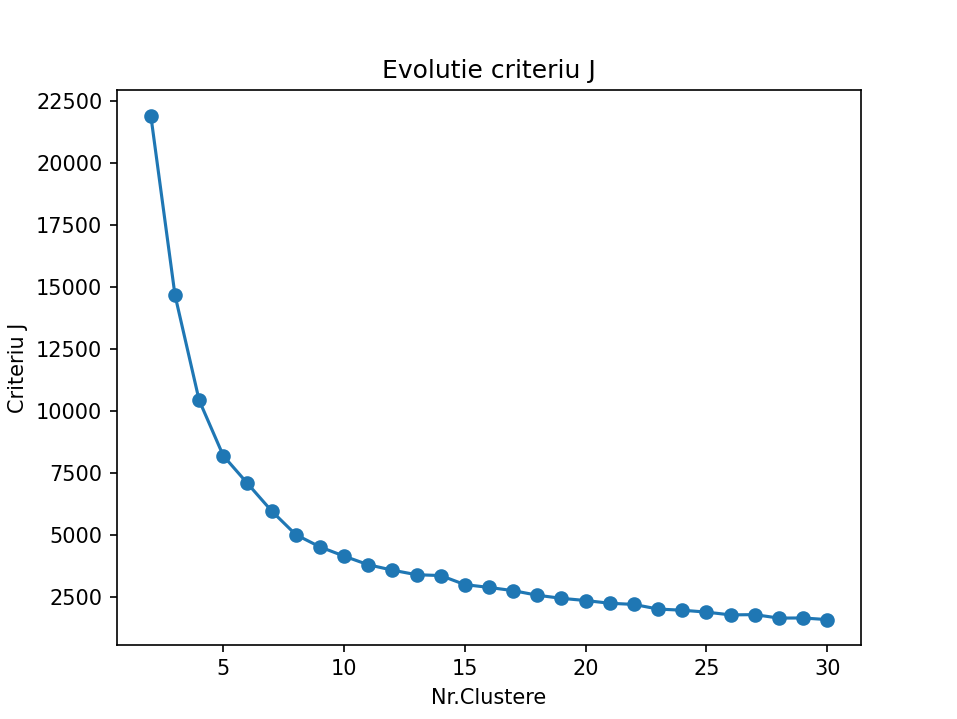

Acesta este un exemplu de output al functiei (rularea dureaza destul de mult, trebuie dat run la celula markdown de deasupra).
Graficul este sugestiv, criteriul j scade abrupt cand numarul de clustere creste, pana la nclusters=15. Intre 15 si 30 de clustere este o scandere foarte lenta. Din graficul anterior se poate trage o concluzie, cea ca numarul optim de clustere este intre 10 si 15, astfel incat sa fie un raport echitabil intre eficientizarea timpului/memoriei utilizate si numarul de clustere.